In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sn

In [3]:
#import dataset

df = pd.read_csv("D:\\Portfolio\\CreditCardFraudDetection\\creditcard.csv")

In [4]:
#take a look!
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#find null size
total_cell  = np.product(df.shape)
null_cell = df.isnull().sum().sum()
null_percent = (null_cell)/(total_cell)*100
print("total cells = ",total_cell)
print("null cells = ",null_cell)
print("%null cells = ",null_percent)

total cells =  8829017
null cells =  0
%null cells =  0.0


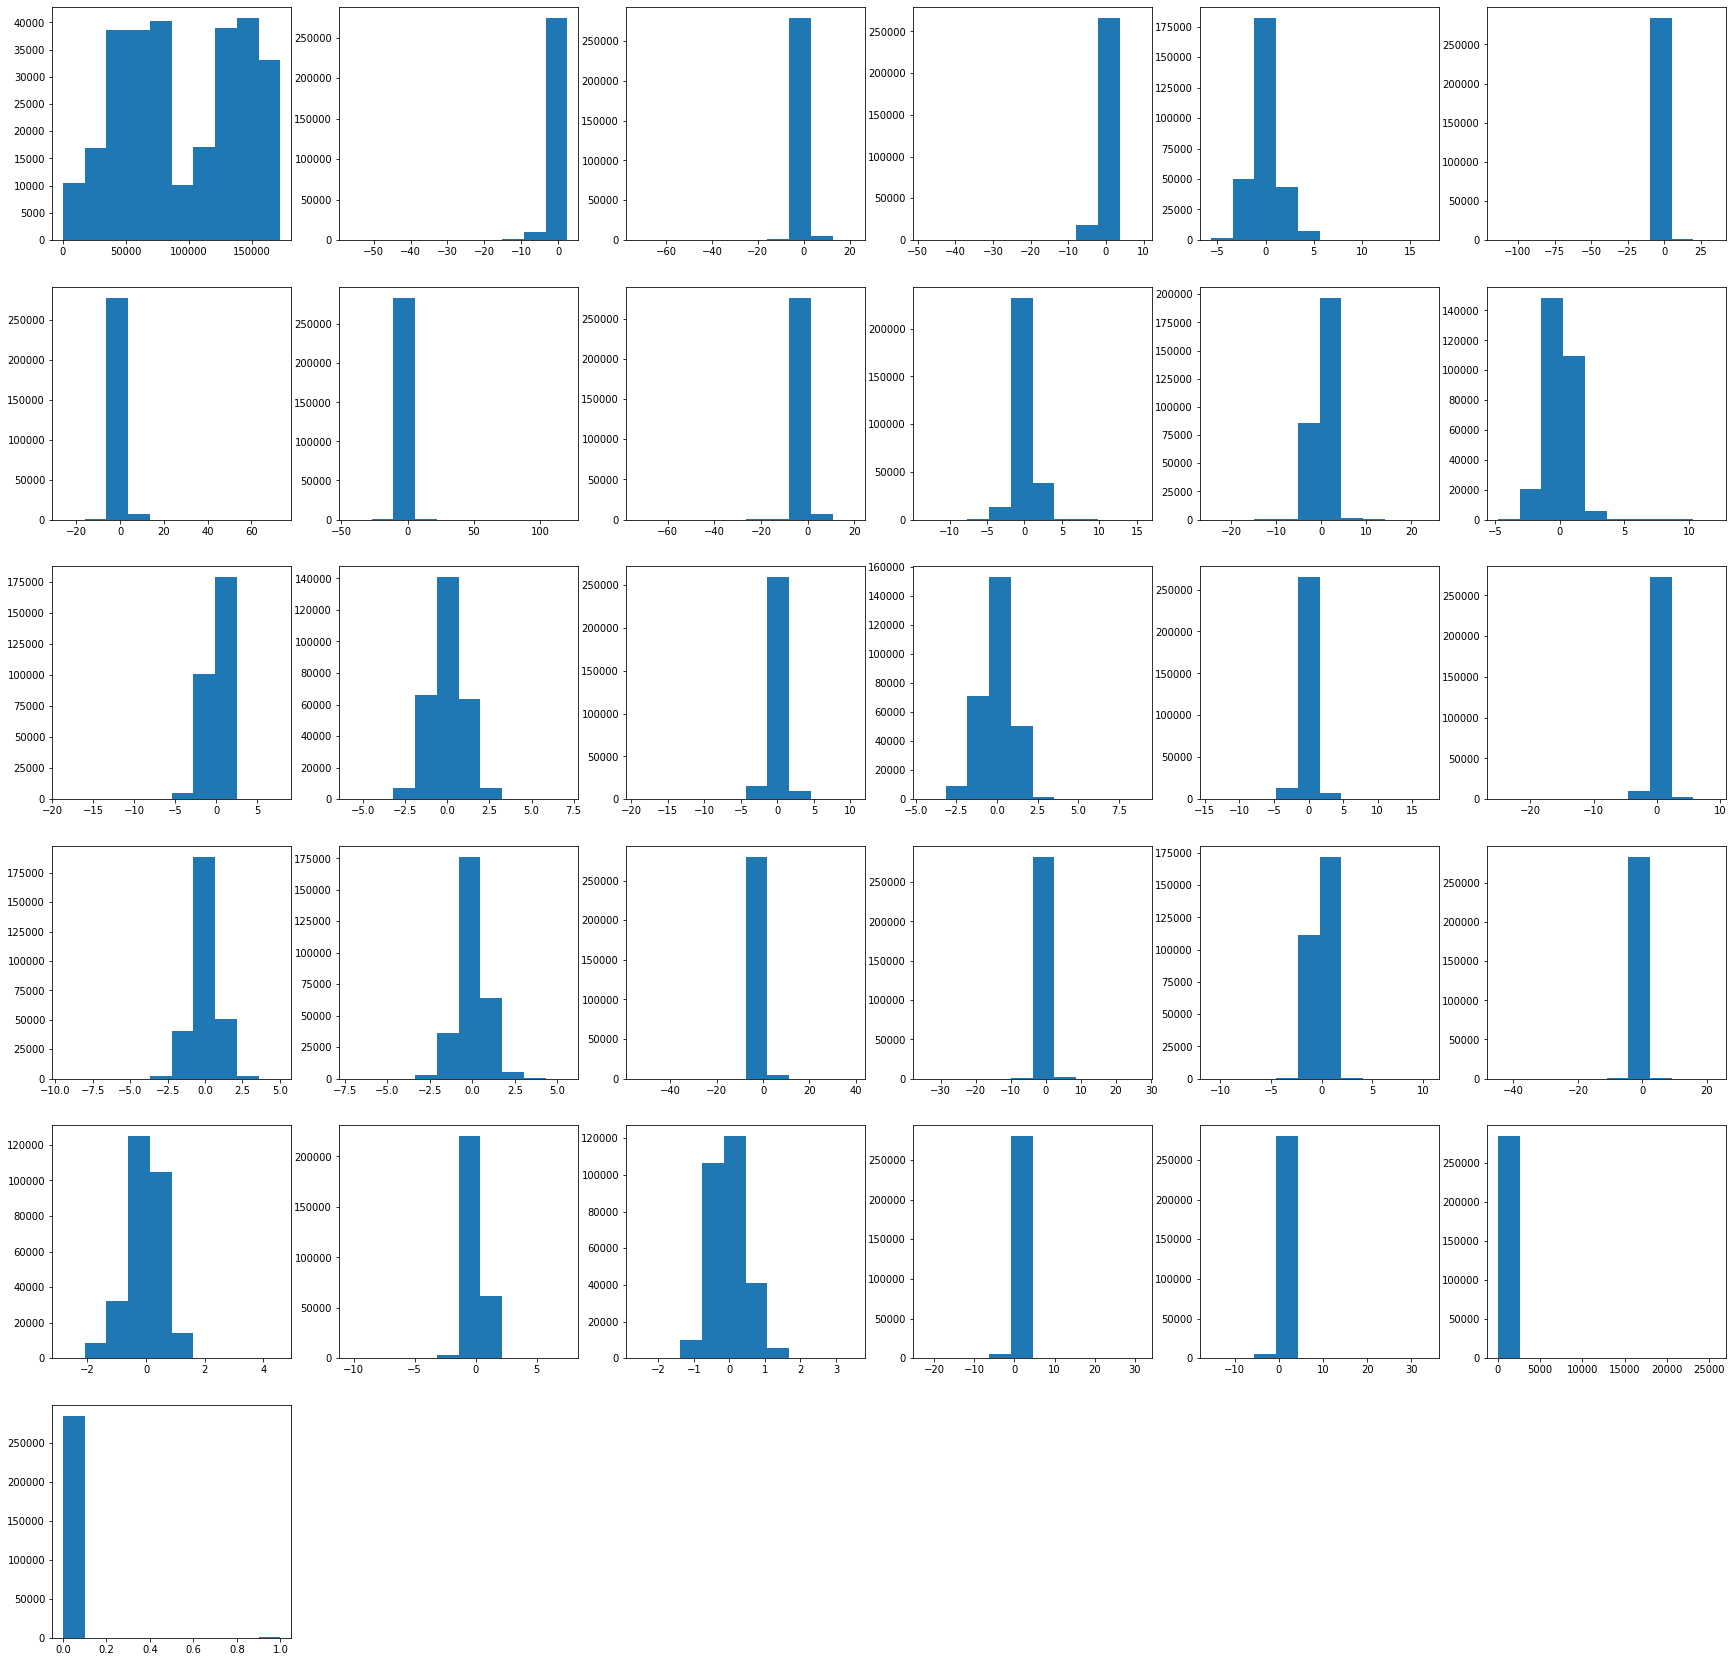

In [37]:


header_list = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
       
plt.figure(figsize=(30,30))
for i in enumerate(df.columns):
    plt.subplot(6,6,i[0]+1)
    plt.hist(i[1],data=df)
    

In [57]:
#Our data is unbalanced so we spilt it to make it balanced
fraud_df = df[df.Class==1]
no_fraud_df = df[df.Class==0]
no_fraud_sample = df.sample(n=492)
no_fraud_sample
new_df =pd.concat([fraud_df,no_fraud_sample],axis=0)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147786,88987.0,2.042083,-0.007921,-1.326843,0.333514,0.093327,-1.061663,0.211493,-0.318173,0.531920,...,0.273072,0.919401,0.080359,1.127874,0.228870,-0.162745,-0.020655,-0.047423,5.99,0
241275,150959.0,1.760230,-0.620531,-0.467162,1.194628,-0.561948,0.221086,-0.704884,0.317980,0.989629,...,0.298128,0.649852,0.130846,0.625245,-0.230218,-0.612154,0.020563,-0.024601,85.40,0
216788,140633.0,1.080774,-1.567672,-2.241864,0.640915,-0.234599,-0.366797,0.478501,-0.069006,0.895598,...,0.073001,-0.709274,-0.172960,0.575807,-0.308763,-0.183882,-0.108405,0.053287,473.48,0
17779,28909.0,-0.729574,-2.983374,-0.356503,2.006171,-1.438224,0.128663,1.020031,-0.164121,0.204376,...,0.648863,-0.319661,-0.859392,0.105002,0.030827,-0.435406,-0.135816,0.196589,985.08,0


(array([492.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

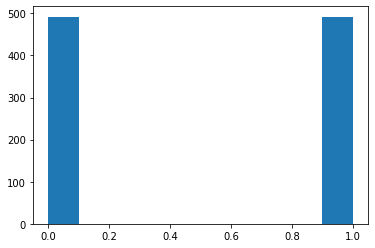

In [61]:
plt.hist(new_df.Class)

In [62]:
from sklearn import preprocessing
standar_scaler = preprocessing.StandardScaler()
independent_features = new_df.iloc[:,:30]
standard_features = standar_scaler.fit_transform(independent_features)
scaled = pd.DataFrame(standard_features)
scaled.columns = independent_features.columns

In [63]:
#split data
from sklearn.model_selection import train_test_split
X = scaled.iloc[:,:30]
y = new_df.iloc[:,30]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=False)

In [64]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Logreg = LogisticRegression()
Logreg.fit(X_train,y_train)
y_pred = Logreg.predict(X_test)

In [65]:
#Model Evaluation
cnf_matrix = metrics.confusion_matrix(y_test, 
y_pred)
print(cnf_matrix)

[[102   4]
 [  6  85]]


Text(0.5, 15.0, 'Predicted label')

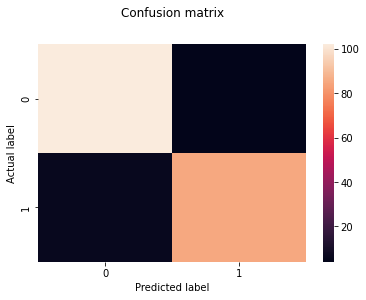

In [66]:
%matplotlib inline
sn.heatmap(pd.DataFrame(cnf_matrix))
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [67]:
#Decision tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() 
clf = clf.fit(X_train,y_train)
y_pred_Dtree = clf.predict(X_test)

In [68]:
#Model Evaluation
cnf_matrix_Dtree = metrics.confusion_matrix(y_test, 
y_pred_Dtree)
print(cnf_matrix_Dtree)

[[95 11]
 [ 4 87]]


In [69]:
#SVM model
from sklearn import svm
clf_SVM = svm.SVC()
clf_SVM = clf_SVM.fit(X_train,y_train)
y_pred_SVM = clf_SVM.predict(X_test)

In [70]:
#Model Evaluation
cnf_matrix_SVM = metrics.confusion_matrix(y_test, 
y_pred_SVM)
print(cnf_matrix_SVM)

[[102   4]
 [  7  84]]
